# Eben Via
# Homework #2
# CSC 478

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
cd H:\Personal\CSC 478\newsgroups

H:\Personal\CSC 478\newsgroups


In [34]:
# read in the training matrix
# the training matrix is in the Row-Column format of term/Document
# That means that the ijth entry is the frequency of the ith term in the jth document

TD= pd.read_csv('trainMatrixModified.txt',sep="\t", header=None)
TD.head()

0    1    2    3    4    5    6    7    8    9   ...   790  791  792  793  \
0  2.0  0.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  3.0  0.0   
2  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0 ...   1.0  1.0  1.0  1.0   
4  8.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  2.0  0.0   

   794  795  796  797  798  799  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  1.0  1.0  1.0  1.0  1.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 800 columns]

###### In the table above, we have 5500 terms and 800 documents

In [35]:
#Converting to an ndarray
TD=np.array(TD)

In [39]:
#import test data
TD_test= pd.read_csv('testMatrixModified.txt',sep="\t", header=None)
TD_test=np.array(TD_test)

In [183]:
#KNN classifier
# x is the vector we are trying to measure distances to
# D is the training set
def knn_search(x, D, K, measure):
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=0))
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(D[:,i]) for i in range(len(D.T))])
        x_norm = np.linalg.norm(x)
        sims = np.array([np.dot(D[:,j],x)/(D_norm[j] * x_norm) for j in range(len(D_norm))])
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K] , sorted(dists)[:K]

In [198]:
#Test run of the knn_search function looking at the 9th document in the TD_test array
index, dist=knn_search(TD_test[:,8:9],TD,3,0)
print index
print dist

[648 798 757]
[6.0827625302982193, 6.324555320336759, 6.4807406984078604]


In [195]:
# Test of teh knn_search function usign the cosine similarity
index, dist=knn_search(TD_test[:,9],TD,3,1)
print index
print dist

[390 734 768]
[0.57561835775977543, 0.62689874637768173, 0.740948176712938]


In [51]:
#import the training and test classes
#then convert it to an ndarray
test_class=pd.read_csv('testclasses.txt',sep="\t", header=None)
test_class=np.asarray(test_class)

train_class=pd.read_csv('trainclasses.txt',sep="\t", header=None)
train_class=np.asarray(train_class)

**This function below is the classifier.
It calls the knn_search function and finds the classes of the k neighbors. Index is an array with the indices of the nearest neighbors. Two separate functions are created for cosine and euclidean distances
**

In [62]:
def classify_euclid(testcase, pos, train, k):
    index, dist=knn_search(testcase[:,pos-1:pos],train,k,0)
    category= train_class[index].sum(axis=0)[1]/float(k)
    category=round(category)
    return category, index

In [203]:
def classify_cosine(testcase, pos, train, k):
    index, dist=knn_search(testcase[:,pos-1],train,k,1)
    category= train_class[index].sum(axis=0)[1]/float(k)
    category=round(category)
    return category, index

** Testing out the classifier below. We see that it returns the same neighbors as the classify function for the 9th document. The predicted class of the 9th test document is '1'**

In [63]:
#Testing out the Euclidean classifier
classify_euclid(TD_test,9,TD,3)

(0.0, array([648, 798, 757], dtype=int64))

In [204]:
#Testing out the Cosine classifier
classify_cosine(TD_test,9,TD,3)

(0.0, array([648, 197,  22], dtype=int64))

**Next we will create a function that computes the classification accuracy for the test data set. We have already imported the test classes. I've created two separate functions, one for Euclidean distance and one for cosine distance **



In [70]:
def classifier_accuracy_euclid(testarray, testclasses, trainarray, k):
    #find out lenght of testarray
    n=len(testarray.T)
    counter=0
    for i in range(1,n+1):
        category,x = classify_euclid(testarray,i,trainarray,k)
        #if the classifier is right, increment a number
        if (category==testclasses[i-1,1]):
            counter=counter+1
    return counter/float(n)

In [205]:
def classifier_accuracy_cosine(testarray, testclasses, trainarray, k):
    #find out lenght of testarray
    n=len(testarray.T)
    counter=0
    for i in range(1,n+1):
        category,x = classify_cosine(testarray,i,trainarray,k)
        #if the classifier is right, increment a number
        if (category==testclasses[i-1,1]):
            counter=counter+1
    return counter/float(n)

In [207]:
#testing out the classifiers
classifier_accuracy_cosine(TD_test, test_class, TD, 1)

0.985

** We will generate two blank arrays that we will fill with the value of k, and the classifier accuracy**

In [66]:
accuracy_mat_euclid=np.ones((20,2))
accuracy_mat_cosine=np.ones((20,2))

In [72]:
# Populating the Euclid matrix
for i in range(1,21):
    accuracy_mat_euclid[i-1]=[i,classifier_accuracy_euclid(TD_test, test_class, TD, i)]

In [208]:
# Populating the cosine matrix
for i in range(1,21):
    accuracy_mat_cosine[i-1]=[i,classifier_accuracy_cosine(TD_test, test_class, TD, i)]

In [73]:
# The accuracy matrix below shows the accuracy of the Euclidean distance classifier for different values of k
# We can see that it reaches a peak when k = 10
accuracy_mat_euclid

array([[  1.   ,   0.78 ],
       [  2.   ,   0.675],
       [  3.   ,   0.81 ],
       [  4.   ,   0.77 ],
       [  5.   ,   0.815],
       [  6.   ,   0.835],
       [  7.   ,   0.765],
       [  8.   ,   0.8  ],
       [  9.   ,   0.75 ],
       [ 10.   ,   0.86 ],
       [ 11.   ,   0.795],
       [ 12.   ,   0.85 ],
       [ 13.   ,   0.775],
       [ 14.   ,   0.82 ],
       [ 15.   ,   0.785],
       [ 16.   ,   0.8  ],
       [ 17.   ,   0.76 ],
       [ 18.   ,   0.785],
       [ 19.   ,   0.74 ],
       [ 20.   ,   0.765]])

In [209]:
# The accuracy matrix below shows the accuracy of the cosine distance classifier for different values of k
# We can see that the cosine classifier is much more accurate than the Euclidean classifier for all values of k
accuracy_mat_cosine

array([[  1.   ,   0.985],
       [  2.   ,   0.98 ],
       [  3.   ,   0.97 ],
       [  4.   ,   0.98 ],
       [  5.   ,   0.97 ],
       [  6.   ,   0.975],
       [  7.   ,   0.98 ],
       [  8.   ,   0.975],
       [  9.   ,   0.975],
       [ 10.   ,   0.985],
       [ 11.   ,   0.98 ],
       [ 12.   ,   0.98 ],
       [ 13.   ,   0.98 ],
       [ 14.   ,   0.985],
       [ 15.   ,   0.985],
       [ 16.   ,   0.985],
       [ 17.   ,   0.975],
       [ 18.   ,   0.975],
       [ 19.   ,   0.975],
       [ 20.   ,   0.975]])

** It appears that the cosine similiarity classifier performs much better than the Euclidean distance classifier **

** transforming to TFIDF **
Using following code for base https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Docs-Terms.ipynb


In [210]:
# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs
# first let's find the doc count for each term
DF = np.array([(TD!=0).sum(1)]).T

print DF

[[50]
 [ 7]
 [10]
 ..., 
 [ 2]
 [ 2]
 [ 2]]


In [212]:
termFreqs=TD.sum(axis=1)

In [213]:
numTerms=TD.shape[0]
NDocs=TD.shape[1]
print numTerms, NDocs

5500 800


In [214]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print NMatrix

[[ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 ..., 
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]]


In [215]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, DF))

In [216]:
print IDF

[[ 4.    4.    4.   ...,  4.    4.    4.  ]
 [ 6.84  6.84  6.84 ...,  6.84  6.84  6.84]
 [ 6.32  6.32  6.32 ...,  6.32  6.32  6.32]
 ..., 
 [ 8.64  8.64  8.64 ...,  8.64  8.64  8.64]
 [ 8.64  8.64  8.64 ...,  8.64  8.64  8.64]
 [ 8.64  8.64  8.64 ...,  8.64  8.64  8.64]]


In [217]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TD * IDF

In [244]:
pd.DataFrame(TD_tfidf).head()

0         1    2    3    4    5    6    7    8    9      ...     790  \
0   8.000000  0.000000  0.0  8.0  8.0  0.0  0.0  0.0  0.0  0.0    ...     0.0   
1  13.673003  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0   
2  12.643856  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0   
3   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0   
4  23.111750  2.888969  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0   

   791        792  793  794  795  796  797  798       799  
0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  
1  0.0  20.509504  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  
2  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  
3  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  
4  0.0   5.777937  0.0  0.0  0.0  0.0  0.0  0.0  2.888969  

[5 rows x 800 columns]

In [310]:
#Create a new test vector whose entries are the count of terms
x=TD_test#[:,0:1]

x=x.T

In [311]:
#Transform this new test vector
x_tfidf= x*IDF.T[0]
x_tfidf=x_tfidf.T 

print x_tfidf

[[ 0.  0.  4. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [312]:
#doing a test for classifier accuracy with 3 neighbors

classifier_accuracy_euclid(x_tfidf,test_class,TD_tfidf,3)

0.75

In [313]:
accuracy_mat_tfidf=np.ones((20,2))

for i in range(1,21):
    accuracy_mat_tfidf[i-1]=[i,classifier_accuracy_euclid(x_tfidf,test_class,TD_tfidf, i)]

In [314]:
accuracy_mat_tfidf

array([[  1.  ,   0.71],
       [  2.  ,   0.61],
       [  3.  ,   0.75],
       [  4.  ,   0.63],
       [  5.  ,   0.8 ],
       [  6.  ,   0.82],
       [  7.  ,   0.73],
       [  8.  ,   0.74],
       [  9.  ,   0.68],
       [ 10.  ,   0.76],
       [ 11.  ,   0.68],
       [ 12.  ,   0.72],
       [ 13.  ,   0.65],
       [ 14.  ,   0.68],
       [ 15.  ,   0.62],
       [ 16.  ,   0.66],
       [ 17.  ,   0.61],
       [ 18.  ,   0.68],
       [ 19.  ,   0.63],
       [ 20.  ,   0.66]])

**The classifier appears to perform worse than the original methods we used**

In [239]:
#Rocchio method
# The function below creates both prototype vectors
def prototype_vector(train, classes):
    class1 = train[:,classes[classes[:,1]==1][:,0]].sum(axis=1)
    class0 = train[:,classes[classes[:,1]==0][:,0]].sum(axis=1)
    return class1,class0

In [243]:
# Create the prototype vectors
proto1, proto0=prototype_vector(TD, train_class)


In [260]:
# Now we will create the classification function to take in the test data
def classify_rocchio(testcase, pos, proto1, proto0):
    #compute teh simililarity measures to each prototype vector
    sim1 = np.dot(proto1,testcase[:,pos-1])/(np.array(np.linalg.norm(proto1))*np.linalg.norm(testcase[:,pos-1]))
    sim0 = np.dot(proto0,testcase[:,pos-1])/(np.array(np.linalg.norm(proto0))*np.linalg.norm(testcase[:,pos-1]))
    if sim1 > sim0:
        category=1
    else:
        category=0
    return category, sim1, sim0

In [261]:
# Testing out the Rocchio Classifier
classify_rocchio(TD_test,3,proto1,proto0)

(1, 0.15694376511927788, 0.13859723271108856)

In [264]:
# Compute the classification accuracy of the Rocchio classifier
def classifier_accuracy_rocchio(testarray, proto1, proto0):
    #find out lenght of testarray
    n=len(testarray.T)
    counter=0
    for i in range(1,n+1):
        category,sim1, sim0 = classify_rocchio(testarray,i,proto1, proto0)
        #if the classifier is right, increment a number
        if (category==test_class[i-1,1]):
            counter=counter+1
    return counter/float(n)

In [265]:
# Test out the accuracy of the classifier
classifier_accuracy_rocchio(TD_test, proto1,proto0)

0.975

** We can see that the Rocchio classifier is very accurate, comparable with the cosine similarity based classifier, as expected **

# #2 - Bank Data

In [282]:
from sklearn import neighbors

In [283]:
cd H:\Personal\CSC 478

H:\Personal\CSC 478


** First we load and preprocess the data using Numpy, pandas, and scikit learn **

In [284]:
# A) reading in the data
bank_df = pd.read_csv('bank_data.csv')
bank_df.head()

id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   
3  ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO   
4  ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  
3           NO          YES       NO   NO  
4          YES           NO       NO   NO

In [285]:
#first will creat the target attribute
bank_target=bank_df.pep

In [286]:
#Removing the target attribute from the input attributes that we will user for training and testing
bank_df=bank_df[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']]

In [287]:
#Converting input attributes to numeric so we can use scikit learn functions
bank_df = pd.get_dummies(bank_df)
bank_df.head()

age   income  children  gender_FEMALE  gender_MALE  region_INNER_CITY  \
0   48  17546.0         1            1.0          0.0                1.0   
1   40  30085.1         3            0.0          1.0                0.0   
2   51  16575.4         0            1.0          0.0                1.0   
3   23  20375.4         3            1.0          0.0                0.0   
4   57  50576.3         0            1.0          0.0                0.0   

   region_RURAL  region_SUBURBAN  region_TOWN  married_NO  married_YES  \
0           0.0              0.0          0.0         1.0          0.0   
1           0.0              0.0          1.0         0.0          1.0   
2           0.0              0.0          0.0         0.0          1.0   
3           0.0              0.0          1.0         0.0          1.0   
4           1.0              0.0          0.0         0.0          1.0   

   car_NO  car_YES  savings_acct_NO  savings_acct_YES  current_acct_NO  \
0     1.0      0.0              1.0               0.0              1.0   
1     0.0      1.0              1.0               0.0              0.0   
2     0.0      1.0              0.0               1.0              0.0   
3     1.0      0.0              1.0               0.0              0.0   
4     1.0      0.0              0.0               1.0              1.0   

   current_acct_YES  mortgage_NO  mortgage_YES  
0               0.0          1.0           0.0  
1               1.0          0.0           1.0  
2               1.0          1.0           0.0  
3               1.0          1.0           0.0  
4               0.0          1.0           0.0

In [288]:
#Split the data set into training and test datasets
from sklearn.cross_validation import train_test_split

bank_train, bank_test, bank_target_train, bank_target_test = train_test_split(bank_df, bank_target, test_size=0.2, random_state=33)


In [289]:
# We can see that we've split the datasets by looking at the shape of each array
print bank_train.shape
print bank_test.shape

(480, 19)
(120, 19)


In [290]:
# For KNN, we will do min max normaliztion
from sklearn import preprocessing

In [291]:
# Min Max normalization will be based on the training data set
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)

# Creating normalized version of the training and test sets
bank_train_norm = min_max_scaler.transform(bank_train)
bank_test_norm = min_max_scaler.transform(bank_test)
#print min_max_scaler

** Now we will run scikit-learns KNN classifier on our data **

In [292]:
from sklearn import neighbors

In [293]:
n_neighbors = 5

# Creating and training the classifier on the training set
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [304]:
#running the KNN classifier on the test norm
knnpreds_test = knnclf.predict(bank_test_norm)

In [305]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

knncm = confusion_matrix(bank_target_test, knnpreds_test)
print knncm

[[57  9]
 [29 25]]


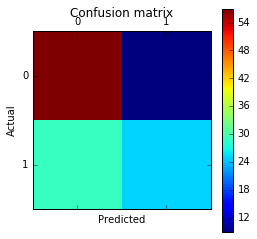

In [306]:
# Visualizing the confusion matrix
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [524]:
# Generate the classification report
from sklearn.metrics import classification_report

print classification_report(bank_target_test, knnpreds_test)

             precision    recall  f1-score   support

         NO       0.68      0.73      0.70        66
        YES       0.63      0.57      0.60        54

avg / total       0.66      0.66      0.66       120



In [531]:
# Find average accuracy scores
print "Average accuracy for test data \n"
print knnclf.score(bank_test_norm, bank_target_test)

print "Average accuracy for train data \n"
print knnclf.score(bank_train_norm, bank_target_train)

Average accuracy for test data 

0.658333333333
Average accuracy for train data 

1.0


** Because we have a much higher accuracy on the training data, we may be overfitting to the training data set **

In [301]:
# experiminet with different k and weight parameters
knnclf = neighbors.KNeighborsClassifier(2, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)
print "Average accuracy for test data \n"
print knnclf.score(bank_test_norm, bank_target_test)

knnclf = neighbors.KNeighborsClassifier(10, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)
print "Average accuracy for test data \n"
print knnclf.score(bank_test_norm, bank_target_test)

knnclf = neighbors.KNeighborsClassifier(20, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)
print "Average accuracy for test data \n"
print knnclf.score(bank_test_norm, bank_target_test)

knnclf = neighbors.KNeighborsClassifier(2, weights='uniform')
knnclf.fit(bank_train_norm, bank_target_train)
print "Average accuracy for test data \n"
print knnclf.score(bank_test_norm, bank_target_test)

knnclf = neighbors.KNeighborsClassifier(10, weights='uniform')
knnclf.fit(bank_train_norm, bank_target_train)
print "Average accuracy for test data \n"
print knnclf.score(bank_test_norm, bank_target_test)

knnclf = neighbors.KNeighborsClassifier(20, weights='uniform')
knnclf.fit(bank_train_norm, bank_target_train)
print "Average accuracy for test data \n"
print knnclf.score(bank_test_norm, bank_target_test)


Average accuracy for test data 

0.633333333333
Average accuracy for test data 

0.65
Average accuracy for test data 

0.625
Average accuracy for test data 

0.625
Average accuracy for test data 

0.691666666667
Average accuracy for test data 

0.683333333333


** After playing around with different values of K and the weight paramater, I get my best accuracy using a uniform weight and 10 neighbors. Note: This is based on the accuracy of the test data set **

** We will repeat the classification we just performed with KNN using scikit learn's decision tree and Naive Bayes classifiers **

In [21]:
from sklearn import tree

In [507]:
# Creating the decision tree classifier
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [508]:
#creating the decision tree classifier
treeclf = treeclf.fit(bank_train, bank_target_train)

In [509]:
# checking to see the results of the prediction on the test data
treepreds_test = treeclf.predict(bank_test)
print treepreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [533]:
# Generate the confusion matrix
treecm = confusion_matrix(bank_target_test, treepreds_test)
print treecm


[[56 10]
 [12 42]]


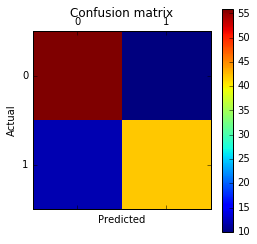

In [534]:
# Visualizing the confusion matrix
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [535]:
# Generate the classification report
print classification_report(bank_target_test, treepreds_test)

             precision    recall  f1-score   support

         NO       0.82      0.85      0.84        66
        YES       0.81      0.78      0.79        54

avg / total       0.82      0.82      0.82       120



In [542]:
# Find average accuracy scores
print "Average accuracy for test data \n"
print treeclf.score(bank_test, bank_target_test)

print "Average accuracy for train data \n"
print treeclf.score(bank_train, bank_target_train)

Average accuracy for test data 

0.816666666667
Average accuracy for train data 

0.985416666667


In [510]:
from sklearn import naive_bayes

In [511]:
# training a Naive Bayes classifier
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train, bank_target_train)
nbpreds_test = nbclf.predict(bank_test)
print nbpreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [537]:

# Generate the confusion matrix

nbcm = confusion_matrix(bank_target_test, nbpreds_test)
print nbcm

[[49 17]
 [32 22]]


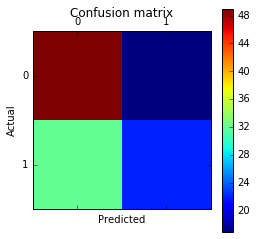

In [538]:

# Visualizing the confusion matrix
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [539]:
# Generate the classification report
print classification_report(bank_target_test, nbpreds_test)

             precision    recall  f1-score   support

         NO       0.60      0.74      0.67        66
        YES       0.56      0.41      0.47        54

avg / total       0.59      0.59      0.58       120



In [541]:
# Find average accuracy scores
print "Average accuracy for test data \n"
print nbclf.score(bank_test, bank_target_test)

print "Average accuracy for train data \n"
print nbclf.score(bank_train, bank_target_train)

Average accuracy for test data 

0.591666666667
Average accuracy for train data 

0.65625


**
The KNN classifer seems to be overfitting the data, which suggests a high variance. Overall changing the number of neighbors used to classify gave us slight improvements. The decision tree appeared to perform better than KNN, but once again we are trading bias for higher variance, as seen in the spread between the accuracy of the test and training data. Naive Bayes appeared to have a lower variance in the between the test and training sets, but did not perform as well as the other models**

# #3 - Census Data

** The first part will be preprocessing the data and handling missng values **

In [11]:
#import the dataset

census= pd.read_csv('adult-modified.csv',sep=",", na_values=["?"])
census.head()

age workclass  education marital-status   race     sex  hours-per-week  \
0  39.0    Public         13         Single  White    Male              40   
1  50.0  Self-emp         13        Married  White    Male              13   
2  38.0   Private          9         Single  White    Male              40   
3  53.0   Private          7        Married  Black    Male              40   
4  28.0   Private         13        Married  Black  Female              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

In [271]:
#examine the dataset for missing values
#Impute of drop as needed
census.describe(include="all")

age workclass     education marital-status   race    sex  \
count   9802.000000      9412  10000.000000          10000  10000  10000   
unique          NaN         3           NaN              2      5      2   
top             NaN   Private           NaN         Single  White   Male   
freq            NaN      6947           NaN           5017   8556   6703   
mean      38.449806       NaN     10.076600            NaN    NaN    NaN   
std       13.611949       NaN      2.548172            NaN    NaN    NaN   
min       17.000000       NaN      1.000000            NaN    NaN    NaN   
25%       27.000000       NaN      9.000000            NaN    NaN    NaN   
50%       37.000000       NaN     10.000000            NaN    NaN    NaN   
75%       47.000000       NaN     12.000000            NaN    NaN    NaN   
max       90.000000       NaN     16.000000            NaN    NaN    NaN   

        hours-per-week income  
count     10000.000000  10000  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7621  
mean         40.530300    NaN  
std          12.277197    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          45.000000    NaN  
max          99.000000    NaN

**Age and workclass have some missing values. Age is numeric, so we'll impute the average for missing values. Workingclass is categorical, so we'll drop those values **

In [12]:
# Dropping the missing working class observations
census.drop(census[census.workclass.isnull()].index, axis=0, inplace=True)

In [283]:
#examining the shape of the dataframe to see tha we've dropped about 600 rows
census.shape

(9412, 8)

In [13]:
#Imputing the value of age
age_mean = census.age.mean()
census.age.fillna(age_mean, axis=0, inplace=True)

In [14]:
census.describe(include='all')

age workclass    education marital-status   race   sex  \
count   9412.000000      9412  9412.000000           9412   9412  9412   
unique          NaN         3          NaN              2      5     2   
top             NaN   Private          NaN        Married  White  Male   
freq            NaN      6947          NaN           4737   8062  6383   
mean      38.364632       NaN    10.125266            NaN    NaN   NaN   
std       12.962034       NaN     2.542118            NaN    NaN   NaN   
min       17.000000       NaN     1.000000            NaN    NaN   NaN   
25%       28.000000       NaN     9.000000            NaN    NaN   NaN   
50%       37.000000       NaN    10.000000            NaN    NaN   NaN   
75%       47.000000       NaN    13.000000            NaN    NaN   NaN   
max       90.000000       NaN    16.000000            NaN    NaN   NaN   

        hours-per-week income  
count      9412.000000   9412  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7093  
mean         41.080217    NaN  
std          11.884590    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          45.000000    NaN  
max          99.000000    NaN

**We can see that we've handled the missing values**

In [547]:
# Statistics for each attribute
# Using the describe function to view the relevant attribute statistics
census.describe(include='all')

age workclass    education marital-status   race   sex  \
count   9412.000000      9412  9412.000000           9412   9412  9412   
unique          NaN         3          NaN              2      5     2   
top             NaN   Private          NaN        Married  White  Male   
freq            NaN      6947          NaN           4737   8062  6383   
mean      38.364632       NaN    10.125266            NaN    NaN   NaN   
std       12.962034       NaN     2.542118            NaN    NaN   NaN   
min       17.000000       NaN     1.000000            NaN    NaN   NaN   
25%       28.000000       NaN     9.000000            NaN    NaN   NaN   
50%       37.000000       NaN    10.000000            NaN    NaN   NaN   
75%       47.000000       NaN    13.000000            NaN    NaN   NaN   
max       90.000000       NaN    16.000000            NaN    NaN   NaN   

        hours-per-week income  
count      9412.000000   9412  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7093  
mean         41.080217    NaN  
std          11.884590    NaN  
min           1.000000    NaN  
25%          40.000000    NaN  
50%          40.000000    NaN  
75%          45.000000    NaN  
max          99.000000    NaN

** For the numeric variables we will generate histograms to view the distributions **

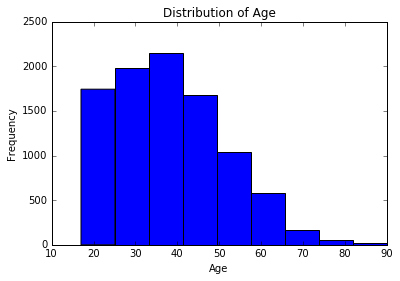

In [549]:
#histograms of age
census.age.plot(kind='hist', bins=9)
plt.title('Distribution of Age')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

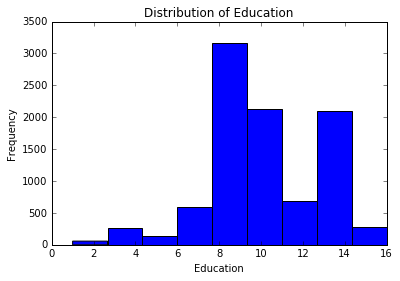

In [550]:
census.education.plot(kind='hist', bins=9)
plt.title('Distribution of Education')
plt.ylabel('Frequency')
plt.xlabel('Education')
plt.show()

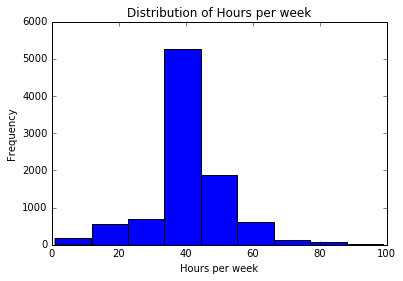

In [551]:
census['hours-per-week'].plot(kind='hist', bins=9)
plt.title('Distribution of Hours per week')
plt.ylabel('Frequency')
plt.xlabel('Hours per week')
plt.show()

**For the categorical variables we will generate bar graphs **

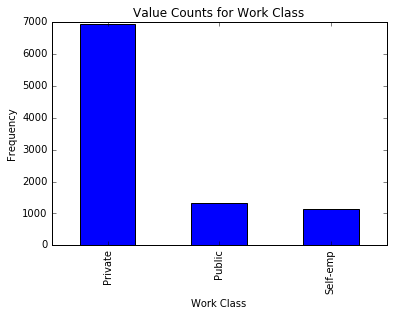

In [552]:
census.workclass.value_counts().plot(kind='bar')
plt.title('Value Counts for Work Class')
plt.ylabel('Frequency')
plt.xlabel('Work Class')
plt.show()

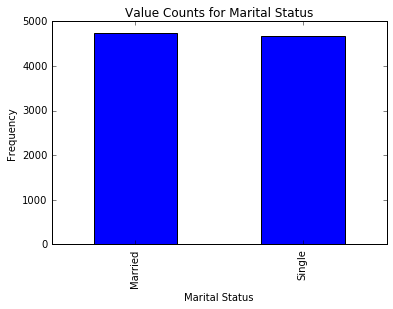

In [553]:
census["marital-status"].value_counts().plot(kind='bar')
plt.title('Value Counts for Marital Status')
plt.ylabel('Frequency')
plt.xlabel('Marital Status')
plt.show()

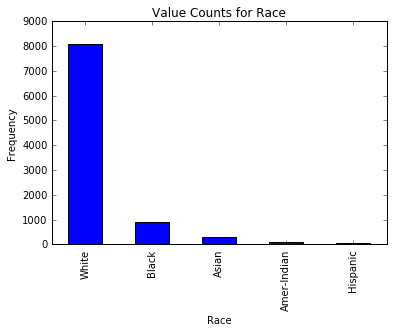

In [554]:
census["race"].value_counts().plot(kind='bar')
plt.title('Value Counts for Race')
plt.ylabel('Frequency')
plt.xlabel('Race')
plt.show()

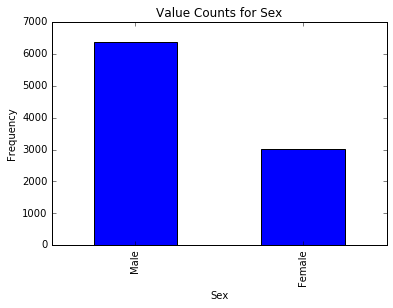

In [555]:
census["sex"].value_counts().plot(kind='bar')
plt.title('Value Counts for Sex')
plt.ylabel('Frequency')
plt.xlabel('Sex')
plt.show()

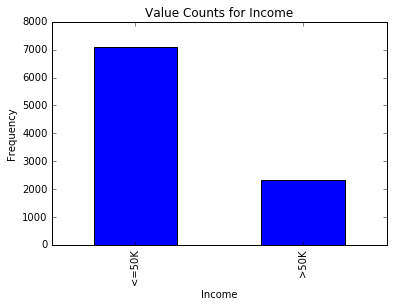

In [556]:
census["income"].value_counts().plot(kind='bar')
plt.title('Value Counts for Income')
plt.ylabel('Frequency')
plt.xlabel('Income')
plt.show()

**Perform the following cross-tabulations 
(including generating bar charts): 
    education+race, 
    work-class+income, 
    work-class+race, and 
    race+income. 
In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. 
Discuss your observations from this analysis.**

In [570]:
#create the crosstabs 
census_edu_race = pd.crosstab(census.education,census.race)
census_wc_inc = pd.crosstab(census.workclass, census.income)
census_wc_race = pd.crosstab(census.workclass, census.race)
census_race_inc = pd.crosstab(census.race,census.income)


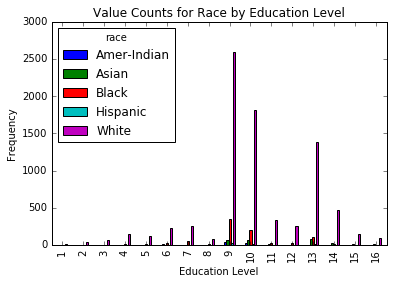

In [579]:
census_edu_race.plot(kind='bar')
plt.title('Value Counts for Race by Education Level')
plt.ylabel('Frequency')
plt.xlabel('Education Level')
plt.show()

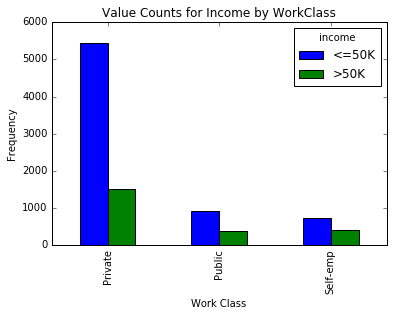

In [565]:
census_wc_inc.plot(kind='bar')
plt.title('Value Counts for Income by WorkClass')
plt.ylabel('Frequency')
plt.xlabel('Work Class')
plt.show()

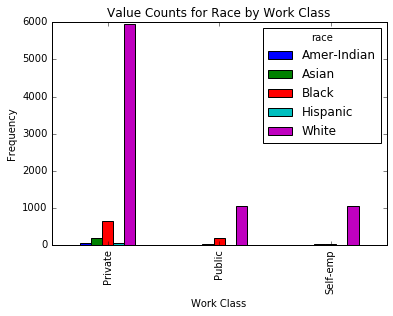

In [582]:
census_wc_race.plot(kind='bar')
plt.title('Value Counts for Race by Work Class')
plt.ylabel('Frequency')
plt.xlabel('Work Class')
plt.show()

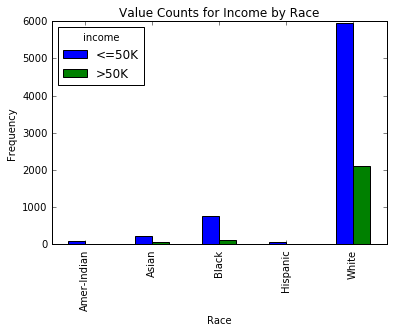

In [566]:
census_race_inc.plot(kind='bar')
plt.title('Value Counts for Income by Race')
plt.ylabel('Frequency')
plt.xlabel('Race')
plt.show()

In [600]:
# percentages of each race category that fall in the low-income group. 

census_race_inc.divide(census_race_inc.sum(axis=1), axis=0)

income          <=50K      >50K
race                           
Amer-Indian  0.902174  0.097826
Asian        0.769759  0.230241
Black        0.866592  0.133408
Hispanic     0.920000  0.080000
White        0.737286  0.262714

**
Aboout three quarters of Asian and White people fall into the low income group. A higher percentage (+86%) of the other races fall into the low income group. Overall a vast majority of all people are in the low income group. **

**The low income group occurs with the highest proportion in the private working class. While low income makes up the majority of all the work classes, the relative proportion appears smaller for the self employed group**

## Predictive Modeling and Evaluation of Census data 

In [16]:
#create dummy variables for the categorical variables
census_dummy = pd.get_dummies(census)

In [17]:
#dropping the extra dummy variable created
census_dummy.drop("income_>50K", axis=1, inplace=True)

In [315]:
#Separate target attribute from the input attributes
#target=pd.DataFrame(census_dummy["income_<=50K"])
target=census_dummy["income_<=50K"]

census_train = census_dummy.drop("income_<=50K", axis=1)
census_train.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                0.0               1.0   
1  50.0         13              13                0.0               0.0   
2  38.0          9              40                1.0               0.0   
3  53.0          7              40                1.0               0.0   
4  28.0         13              40                1.0               0.0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                 0.0                     0.0                    1.0   
1                 1.0                     1.0                    0.0   
2                 0.0                     0.0                    1.0   
3                 0.0                     1.0                    0.0   
4                 0.0                     1.0                    0.0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0               0.0         0.0         0.0            0.0         1.0   
1               0.0         0.0         0.0            0.0         1.0   
2               0.0         0.0         0.0            0.0         1.0   
3               0.0         0.0         1.0            0.0         0.0   
4               0.0         0.0         1.0            0.0         0.0   

   sex_Female  sex_Male  
0         0.0       1.0  
1         0.0       1.0  
2         0.0       1.0  
3         0.0       1.0  
4         1.0       0.0

In [622]:
# Fitting the NB classifier.
# Do I need to split it into trainign and test sets?
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(census_train, target)
#nbpreds_test = nbclf.predict(bank_test)
#print nbpreds_test

In [19]:
from sklearn import cross_validation

In [625]:
# Cross validation of the NB Classifier
cv_scores = cross_validation.cross_val_score(nbclf, census_train, target, cv=10)
print cv_scores
print cv_scores.mean()

[ 0.73  0.7   0.73  0.7   0.73  0.71  0.71  0.72  0.73  0.71]
0.717804771869


In [627]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [628]:
# Training our LDA classifier
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(census_train, target)
#ldpreds_test = ldclf.predict(bank_test)
#print ldpreds_test

In [633]:
# Cross Validation on the LDA classifier
cv_scores = cross_validation.cross_val_score(ldclf, census_train, target, cv=10)
print cv_scores
print 'the overall accuracy is ', cv_scores.mean()

[ 0.81  0.81  0.79  0.82  0.81  0.79  0.8   0.81  0.82  0.82]
the overall accuracy is  0.807587992406


In [22]:
# Creating the decision tree classifier
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [23]:
treeclf = treeclf.fit(census_train, target)

In [24]:
# Cross Validation on the Tree classifier
cv_scores = cross_validation.cross_val_score(treeclf, census_train, target, cv=10)
print cv_scores
print 'the overall accuracy is ', cv_scores.mean()

[ 0.76433121  0.73673036  0.75265393  0.76833156  0.76408077  0.74601488
  0.75026567  0.79171095  0.77258236  0.74361702]
the overall accuracy is  0.759031870512


**For the decision tree model, we will generate a visualization of the tree**

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf,out_file='tree.dot', feature_names=census_train.columns)

In [29]:
system(dot -Tpng tree.dot -o dtree.png)

['dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.405327 to fit']

In [30]:
from IPython.display import Image
Image(filename='dtree.png', width=800)

**The tree appears to be very large**